In [1]:
import torax
import matplotlib.pyplot as plt
import xarray as xr

In [ ]:
torax_config = torax.build_torax_config_from_file('examples/iterhybrid_rampup.py')
torax_config.update_fields({
    "numerics.fixed_dt": 1.0,
    "numerics.t_final": 50.0,   # <-- set what you want here
})
dt, state_history = torax.run_simulation(torax_config)
dt.to_netcdf('iter.nc')

INFO:2025-12-20 16:30:05,870:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-12-20 16:30:05,870 [    INFO] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-12-20 16:30:05,874 [ WARNING] An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
2025-12-20 16:30:08,167 [ WARNING] Falling back to legacy behavior as `profile_conditions.psi` is None. Future versions of TORAX will require `psi` to be provided if `initial_psi_mode` is PROFILE_CONDITIONS. Use `initial_psi_mode` to initialize psi from `j` or `geometry` and avoid this warning.
2025-12-20 16:30:09,315 [    INFO] Loading QLKNNModel from /home/dani/projects/dani2442_code/.venv/lib/python3.11/site-packages/fusion_surrogates/qlknn/models/qlknn_7_11.qlknn
2025-12-20 

In [3]:
dt = xr.open_datatree("iter.nc")

In [4]:
dt.profiles

<xarray.DataTree 'profiles'>
Group: /profiles
    Dimensions:                     (time: 51, rho_face_norm: 26,
                                     rho_cell_norm: 25, rho_norm: 27,
                                     impurity_symbol: 1)
    Coordinates:
      * impurity_symbol             (impurity_symbol) <U2 8B 'Ne'
    Inherited coordinates:
      * time                        (time) float64 408B 0.0 1.0 2.0 ... 49.0 50.0
      * rho_face_norm               (rho_face_norm) float64 208B 0.0 0.04 ... 1.0
      * rho_cell_norm               (rho_cell_norm) float64 200B 0.02 0.06 ... 0.98
      * rho_norm                    (rho_norm) float64 216B 0.0 0.02 ... 0.98 1.0
    Data variables: (12/83)
        sigma_parallel              (time, rho_norm) float64 11kB ...
        v_loop                      (time, rho_norm) float64 11kB ...
        toroidal_velocity           (time, rho_norm) float64 11kB ...
        magnetic_shear              (time, rho_face_norm) float64 11kB ...
        n_impurity                  (time, rho_norm) float64 11kB ...
        Ip_profile                  (time, rho_face_norm) float64 11kB ...
        ...                          ...
        epsilon                     (time, rho_norm) float64 11kB ...
        g0_over_vpr                 (time, rho_face_norm) float64 11kB ...
        g1_over_vpr                 (time, rho_norm) float64 11kB ...
        g1_over_vpr2                (time, rho_norm) float64 11kB ...
        gm9                         (time, rho_norm) float64 11kB ...
        r_mid                       (time, rho_norm) float64 11kB ...

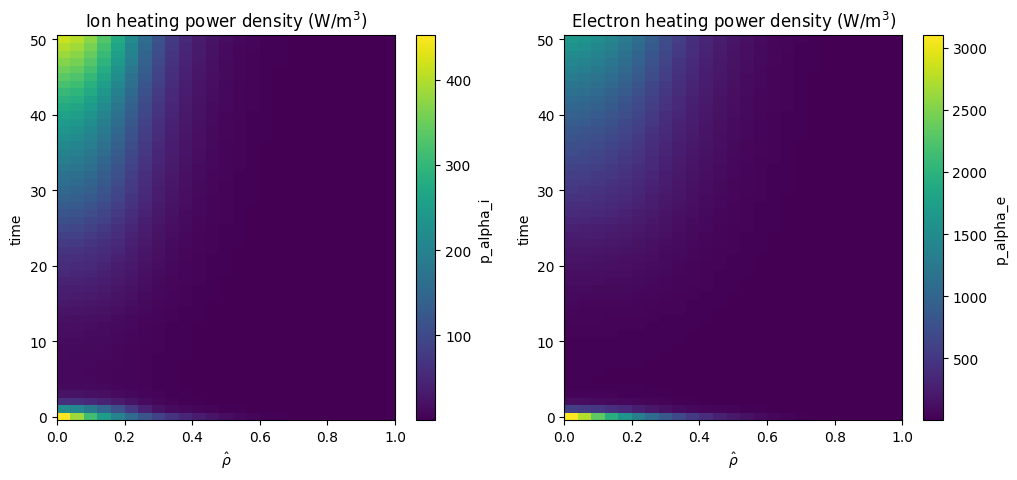

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot p_alpha_i on first subplot
dt.profiles.p_alpha_i.plot(ax=ax1)
ax1.set_xlabel('$\\hat{\\rho}$')
ax1.set_title('Ion heating power density (W/m$^3$)')

# Plot p_alpha_e on second subplot
dt.profiles.p_alpha_e.plot(ax=ax2)
ax2.set_xlabel('$\\hat{\\rho}$')
ax2.set_title('Electron heating power density (W/m$^3$)')

plt.savefig('fusion_power_density.png', dpi=300, bbox_inches='tight')
plt.show()

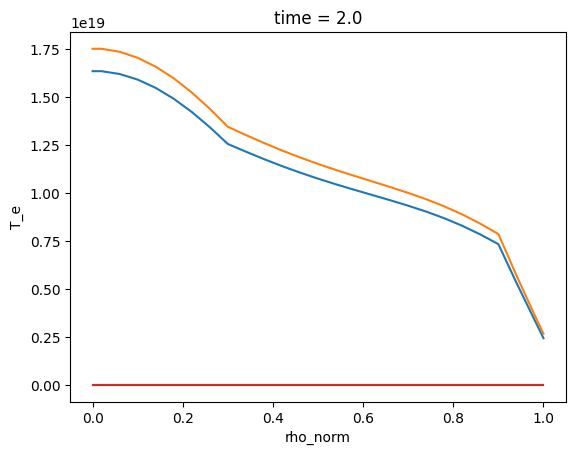

In [5]:
dt.profiles.n_i.sel(time=2, method='nearest').plot()
dt.profiles.n_e.sel(time=2, method='nearest').plot()
dt.profiles.T_i.sel(time=2, method='nearest').plot()
dt.profiles.T_e.sel(time=2, method='nearest').plot()